## Gràfic circular amb Pandas i Matplotlib. 

### Exemple eleccions municipals l'Hospitalet, 2019.

#### Obtingudes de: 
https://www.naciodigital.cat/municipals2019/municipi/08101/hospitalet-llobregat

In [2]:
import numpy as np 
import pandas as pd
import copy
import matplotlib.pyplot as plt

# Obtingudes de: https://www.naciodigital.cat/municipals2019/municipi/08101/hospitalet-llobregat
# csv_file_path_home: str = "./Sessió11_Grafiques/vots-lh-mun-2019.csv"
csv_file_path: str = "vots-lh-mun-2019.csv"
df_eleccions: pd.DataFrame = pd.read_csv(csv_file_path, sep=";")

display(df_eleccions)

   Partit  NumVots PercVots  Regidors
0     PSC    43696   43.35%        14
1     ERC    16342   16.21%         5
2      Cs    11899   11.80%         4
3     ECP    11280   11.19%         3
4      PP     5199    5.16%         1
5  Altres    12786   12.63%         0


#### Posem les columnes en llistes separades si cal.
#### Afegim una columna amb els colors dels partits. 
##### https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

In [6]:
colorsPartits=["Red","Yellow","Orange","Purple","Blue","Pink"]
df_eleccions.loc[:,'Color'] = colorsPartits
display(df_eleccions)

,Partit,NumVots,PercVots,Regidors,color
0,PSC,43696,43.35%,14,Red
1,ERC,16342,16.21%,5,Yellow
2,Cs,11899,11.80%,4,Orange
3,ECP,11280,11.19%,3,Purple
4,PP,5199,5.16%,1,Blue
5,Altres,12786,12.63%,0,Pink


### Diagrama circular % vots.

<AxesSubplot: title={'center': "Resultats Eleccions Municipals 2019 en vots, L'Hospitalet de Llobregat"}, ylabel='NumVots'>

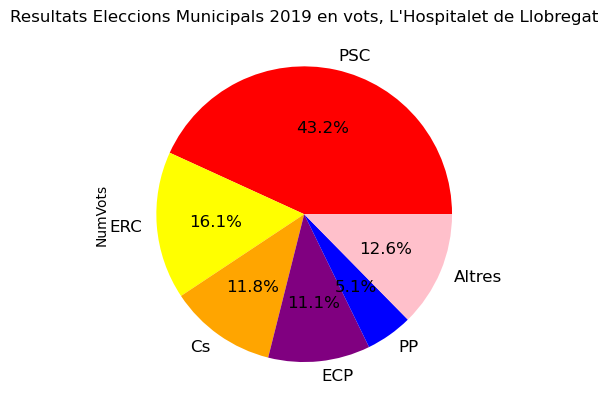

In [16]:
pl_title = "Resultats Eleccions Municipals 2019 en vots, L'Hospitalet de Llobregat"
#Most pandas plots use the label and color arguments (note the lack of “s” on those). 
# To be consistent with matplotlib.pyplot.pie() you must use labels and colors.
colorsPartits=["Red","Yellow","Orange","Purple","Blue","Pink"]

df_eleccions.loc[:,'NumVots'].plot.pie(
    title=pl_title, 
    colors=colorsPartits,
    autopct="%1.1f%%",
    fontsize=12,
    labels=df_eleccions.loc[:,'Partit']
)

### Diagrama barres número representants.

In [49]:
pl_title = "Número Regidors Eleccions Municipals 2019 en vots, L'Hospitalet de Llobregat"

# Per defecte a l'eix de les x posa l'index del dataframe. 
# Farem un nou dataframe en el que l'index sigui el nom del partit en comptes 
# d'un número autogenerat així quedarà bé 

df_eleccions2 = copy.deepcopy(df_eleccions)

# inplace=True per a què actualitzi inmediatament.
df_eleccions2.set_index('Partit', inplace=True)

display(df_eleccions2)

,NumVots,PercVots,Regidors,color
Partit,,,,
PSC,43696,43.35%,14,Red
ERC,16342,16.21%,5,Yellow
Cs,11899,11.80%,4,Orange
ECP,11280,11.19%,3,Purple
PP,5199,5.16%,1,Blue
Altres,12786,12.63%,0,Pink


<AxesSubplot: title={'center': "Número Regidors Eleccions Municipals 2019 en vots, L'Hospitalet de Llobregat"}, xlabel='Partit'>

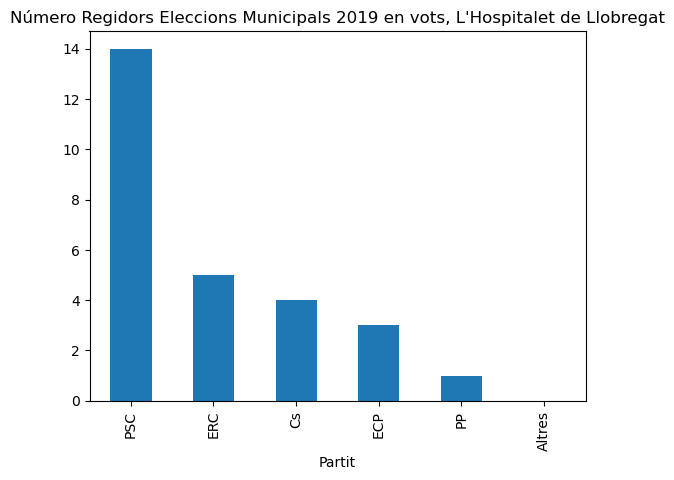

In [50]:

df_eleccions2.loc[:,'Regidors'].plot.bar(title=pl_title, y=df_eleccions.loc[:,'Regidors'])

#### Ara provo un diagrama de línies.

Font:
https://pandas.pydata.org/docs/user_guide/visualization.html

<Figure size 640x480 with 0 Axes>

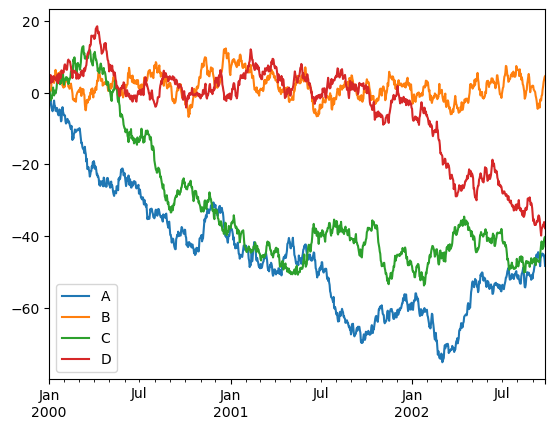

In [52]:
# Creem una timeserie.
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
plt.figure();
df.plot();


#### Exemple, diagrama línies. 
Mostrar diagrama de línies de les temperatures mitjanes del juliol de 3 poblacions en els últims 5 anys.

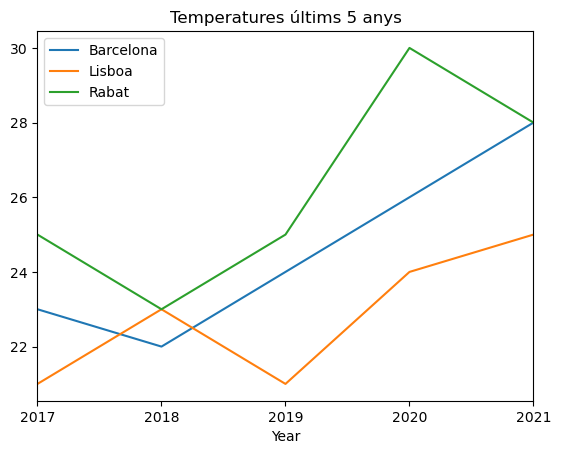

In [71]:
# Creem el data_range dels últims 5 anys (anual).
range_20_last_years = pd.date_range("1/1/2017", periods=5, freq='A')

df = pd.DataFrame(
    index=range_20_last_years, 
    data= {
            "Barcelona":[23,22,24,26,28],
            "Lisboa":[21,23,21,24,25],
            "Rabat":[25,23,25,30,28],
        }
    )
df.index.name="Year"
# display(df)
df.plot(title="Temperatures últims 5 anys",legend=True);